# Desarrollo

## Diseño de acoples

El siguiente es el diseño para las microtiras que acoplarán el amplificador a $50 \Omega$.

In [2]:
from hammerstad import *
import numpy as np
import matplotlib.pyplot as plt
from adapt_imp import *

Se toma como referencia un $\epsilon_r = 4.15$ para un material FR4.

In [3]:
er = 4.15 # Relative permittivity
Zo = 50 # Ohm
H = 1.6e-3 # mm
t = 35e-6

Se comienza calculando el ratio $\frac{W}{H}$.

In [4]:
WH = get_WH(Zo,er)
WH

1.9967298570941503

Resta calcular el $W$ efectivo.

In [5]:
W = WH*H
W

0.0031947677713506407

In [6]:
We = get_W_efectivo(W,H,t)
We

0.0032562157540274713

Se obtiene $W_e=3.26 \ mm$. Ahora hay que buscar $\epsilon_r'$.

In [7]:
erf = get_permitividad_efectiva(WH,er)
erf

3.1698766519288357

Y finalmente corroborar $Z_0$.

In [8]:
z0 = get_impedancia_caracteristica(WH,erf)
z0

50.248434379498356

Se va a trabajar a una $f=1.8 \ GHz$.

In [9]:
lda = 300/1800
lda

0.16666666666666666

In [10]:
lde = lda/np.sqrt(erf)
lde

0.09361114732265245

Para la linea que une al generador con el amplificador, se tiene:

In [11]:
Zin = np.conj((6.82-8.03j))
Zout = np.conj((21.71+7.57j))

d1, Zl41 = s_L4_stub_in(Zin,50,Zo,lde)
print('Longitud del adaptador stub:',d1)
print('Impedancia caracteristica del transformador lambda/4:',Zl41)

Longitud del adaptador stub: 0.01938445602611267
Impedancia caracteristica del transformador lambda/4: 28.526020945230723


Ahora, para la salida del amplificador.

In [12]:
d2, Zl42 = out_L4_stub_l(Zout,50,Zo,lde)
print('Longitud del adaptador stub:',d2)
print('Impedancia caracteristica del transformador lambda/4:',Zl42)

Longitud del adaptador stub: 0.004998578261338278
Impedancia caracteristica del transformador lambda/4: 32.94692701907114


Ahora, se calculan los dos adaptadores de $\lambda /4$. Para eso se calculan como microtiras, en donde se usa la impedancia característica recién obtenida. Para el adaptador que va entre la entrada y el amplificador, se tiene:

In [15]:
WH1 = get_WH(Zl41,er)
W1 = WH1*H
We1 = get_W_efectivo(W1,H,t)
erf1 = get_permitividad_efectiva(WH1,er)
lde1 = lda/np.sqrt(erf1)
l1 = lde1/4
l1

0.02259235736571817

El ancho de la microtira entre el acople de entrada y el amplificador es:

In [17]:
W1

0.007293402083030762

Y su longitud de onda efectiva:

In [19]:
lde1

0.09036942946287269

De ser necesario, cada una de las microtiras calculadas puede alargarse en un factor $\lambda/2$, ya que se representa de esa forma la periodicidad en la carta de Smith. Ahora se sigue con la segunda microtira, la que aparece entre el amplificador y el acople de salida.

In [16]:
WH2 = get_WH(Zl42,er)
W2 = WH2*H
We2 = get_W_efectivo(W2,H,t)
erf2 = get_permitividad_efectiva(WH2,er)
lde2 = lda/np.sqrt(erf2)
l2 = lde2/4
l2

0.0227880988769765

El ancho es:

In [18]:
W2

0.005993255609842166

Y su longitud de onda efectiva:

In [20]:
lde2

0.091152395507906

Finalmente, el resultado del circuito completo simulado es el siguiente:

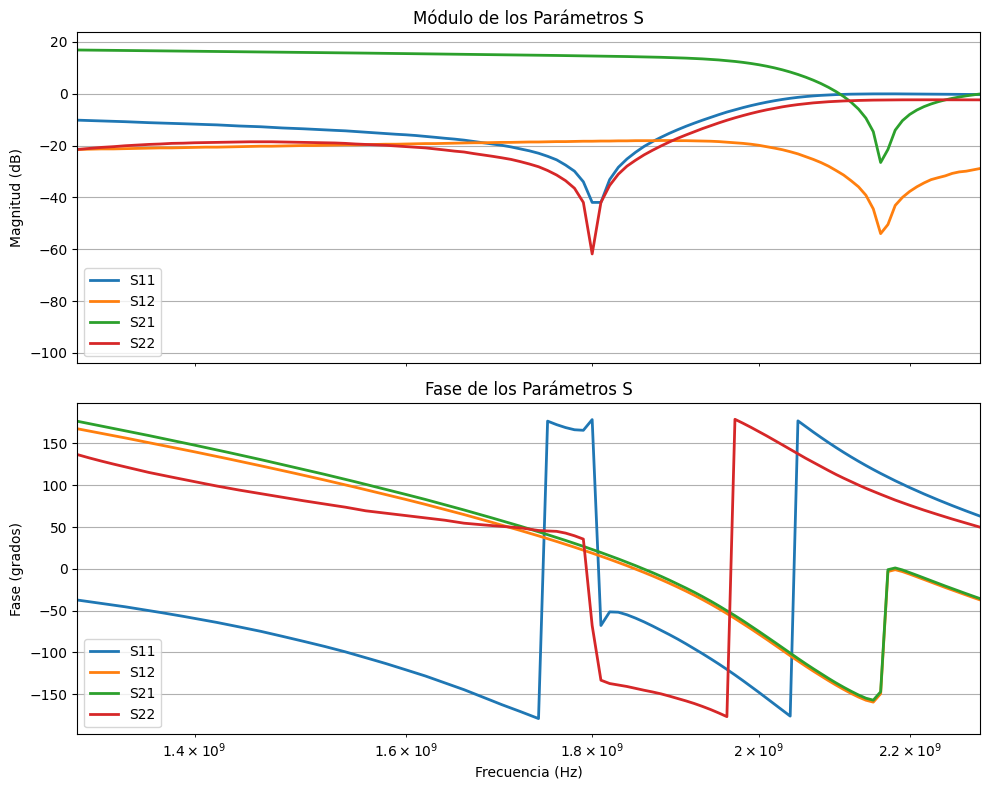

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
filename = '/Users/federicovillar/Documents/GitHub/laboratorios_EA3/TP2/s_params.csv'
data = pd.read_csv(filename, skiprows=10, names=['freq', 'S11', 'S12', 'S21', 'S22'])

# Convertir frecuencias a Hz (asumiendo que las frecuencias están en GHz en el CSV)
data['freq'] = data['freq'].apply(lambda x: float(x.split()[0]) * 1e9)

# Función para convertir la magnitud y fase en grados a una representación compleja
def mag_phase_to_complex(mag_phase):
    mag, phase = mag_phase.split('/')
    mag = float(mag.strip())
    phase = float(phase.strip())
    return mag * np.exp(1j * np.deg2rad(phase))

# Aplicar la conversión a todas las columnas de parámetros S
for col in ['S11', 'S12', 'S21', 'S22']:
    data[col] = data[col].apply(mag_phase_to_complex)

# Crear subplots para el diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotear la magnitud en el primer subplot
for col in ['S11', 'S12', 'S21', 'S22']:
    axs[0].plot(data['freq'], 20 * np.log10(np.abs(data[col])), label=col, linewidth=2)

axs[0].set_title('Módulo de los Parámetros S')
axs[0].set_ylabel('Magnitud (dB)')
axs[0].legend()
axs[0].grid(True)

# Plotear la fase en el segundo subplot
for col in ['S11', 'S12', 'S21', 'S22']:
    axs[1].plot(data['freq'], np.angle(data[col], deg=True), label=col, linewidth=2)

axs[1].set_title('Fase de los Parámetros S')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Fase (grados)')
axs[1].legend()
axs[1].grid(True)

axs[1].set_xlim([1.3e9, 2.3e9])

axs[0].set_xscale('log')
axs[1].set_xscale('log')

plt.tight_layout()
plt.savefig('s_result.pdf')


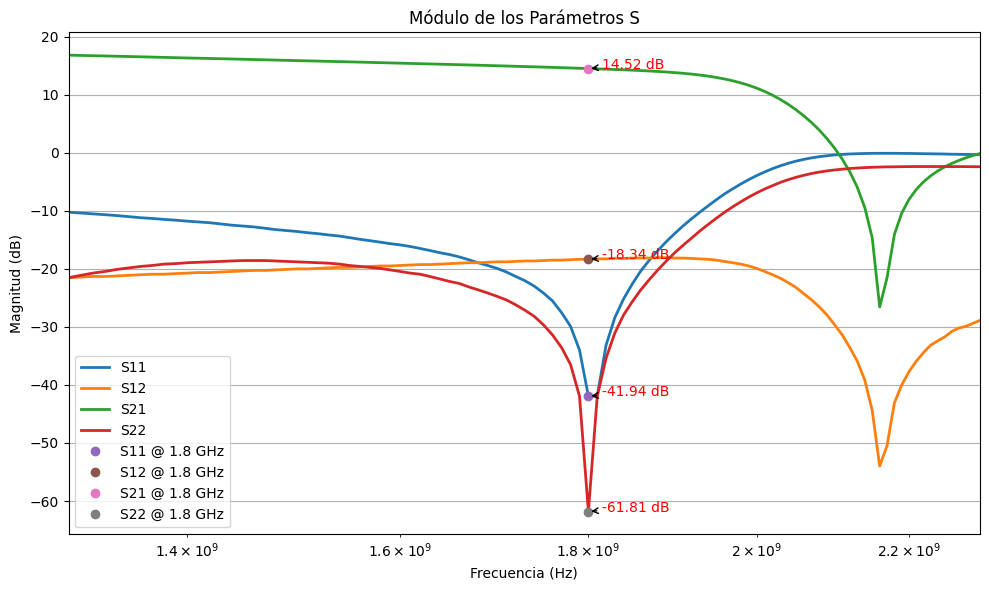

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
filename = '/Users/federicovillar/Documents/GitHub/laboratorios_EA3/TP2/s_params.csv'
data = pd.read_csv(filename, skiprows=10, names=['freq', 'S11', 'S12', 'S21', 'S22'])

# Convertir frecuencias a Hz (asumiendo que las frecuencias están en GHz en el CSV)
data['freq'] = data['freq'].apply(lambda x: float(x.split()[0]) * 1e9)

# Filtrar los datos para el rango de frecuencia deseado (1.3 GHz a 2.3 GHz)
data = data[(data['freq'] >= 1.3e9) & (data['freq'] <= 2.3e9)]

# Función para convertir la magnitud y fase en grados a una representación compleja
def mag_phase_to_complex(mag_phase):
    mag, phase = mag_phase.split('/')
    mag = float(mag.strip())
    phase = float(phase.strip())
    return mag * np.exp(1j * np.deg2rad(phase))

# Aplicar la conversión a todas las columnas de parámetros S
for col in ['S11', 'S12', 'S21', 'S22']:
    data[col] = data[col].apply(mag_phase_to_complex)

# Crear subplots para el diagrama de Bode
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plotear la magnitud en dB
for col in ['S11', 'S12', 'S21', 'S22']:
    axs.plot(data['freq'], 20 * np.log10(np.abs(data[col])), label=col, linewidth=2)

# Agregar marcadores y anotaciones para la frecuencia de 1.8 GHz
freq_marker = 1.8e9
for col in ['S11', 'S12', 'S21', 'S22']:
    value = data[data['freq'] == freq_marker][col].values
    if len(value) > 0:
        mag_db = 20 * np.log10(np.abs(value[0]))
        axs.plot(freq_marker, mag_db, 'o', label=f'{col} @ 1.8 GHz')
        axs.annotate(f'{mag_db:.2f} dB',
                     xy=(freq_marker, mag_db),
                     xytext=(10, 0),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->'),
                     fontsize=10,
                     color='red')

axs.set_title('Módulo de los Parámetros S')
axs.set_ylabel('Magnitud (dB)')
axs.set_xlabel('Frecuencia (Hz)')
axs.legend()
axs.grid(True)
axs.set_xscale('log')
axs.set_xlim([1.3e9, 2.3e9])

plt.tight_layout()
plt.savefig('s_marker.pdf')


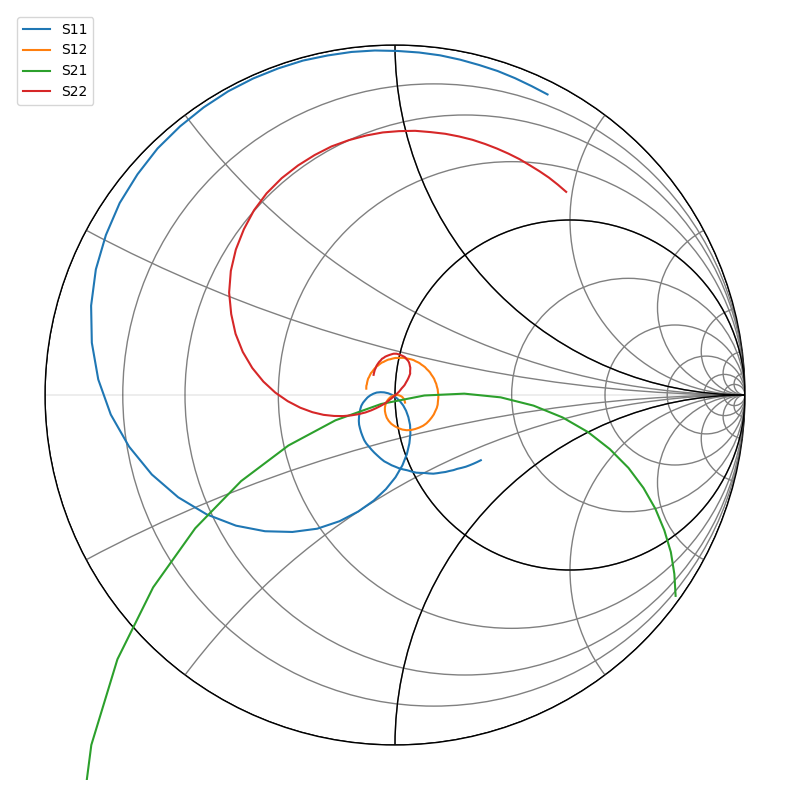

In [16]:
import numpy as np
import pandas as pd
import skrf as rf
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
filename = '/Users/federicovillar/Documents/GitHub/laboratorios_EA3/TP2/s_params.csv'
data = pd.read_csv(filename, skiprows=10, names=['freq', 'S11', 'S12', 'S21', 'S22'])

# Convertir frecuencias a Hz (asumiendo que las frecuencias están en GHz en el CSV)
data['freq'] = data['freq'].apply(lambda x: float(x.split()[0]) * 1e9)

# Filtrar los datos para el rango de frecuencia deseado (1.3 GHz a 2.3 GHz)
data = data[(data['freq'] >= 1.3e9) & (data['freq'] <= 2.3e9)]

# Función para convertir la magnitud y fase en grados a una representación compleja
def mag_phase_to_complex(mag_phase):
    mag, phase = mag_phase.split('/')
    mag = float(mag.strip())
    phase = float(phase.strip())
    return mag * np.exp(1j * np.deg2rad(phase))

# Aplicar la conversión a todas las columnas de parámetros S
for col in ['S11', 'S12', 'S21', 'S22']:
    data[col] = data[col].apply(mag_phase_to_complex)

# Crear una matriz S con las dimensiones adecuadas (frecuencia, puerto de entrada, puerto de salida)
s_params = np.zeros((len(data), 2, 2), dtype=complex)
s_params[:, 0, 0] = data['S11'].values
s_params[:, 0, 1] = data['S12'].values
s_params[:, 1, 0] = data['S21'].values
s_params[:, 1, 1] = data['S22'].values

# Crear una Network de scikit-rf
network = rf.Network(frequency=rf.Frequency.from_f(data['freq'], unit='Hz'), s=s_params)

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear los parámetros S en la carta de Smith
network.plot_s_smith(m=0, n=0, ax=ax, label='S11')
network.plot_s_smith(m=0, n=1, ax=ax, label='S12')
network.plot_s_smith(m=1, n=0, ax=ax, label='S21')
network.plot_s_smith(m=1, n=1, ax=ax, label='S22')

ax.set_title('Parámetros S en la Carta de Smith')

# Ajustar la leyenda y mostrar la gráfica
ax.legend()
plt.show()
